# **Détectez des faux billets avec R ou Python**

## Description

Ce projet s'inscrit dans le cadre d'une mission de consultant Data Analyst au sein de l'Organisation nationale de lutte contre le faux-monnayage (ONCFM). L'objectif principal est de développer un modèle de détection automatique de faux billets en euros en se basant sur certaines dimensions du billet et ses caractéristiques. L'ONCFM nous a fourni un jeu de données pour cette tâche.
Ce projet évalue les compétences en régression linéaire, régression logistique, classifications automatiques et analyse prédictive, tout en répondant aux besoins de l'ONCFM pour lutter contre la contrefaçon des billets en euros.

## Table des matières

- [Import](#I.Import)
- [Analyse](#II.Analysedescriptive)
- [Régression logistique](#III.Modèle)
- [Analyse exploratoire des données pour comprendre la structure des données et identifier d'éventuelles valeurs manquantes.](#II.Analysedescriptive)
- [Traitement des données manquantes en utilisant une régression linéaire.](#II.Analysedescriptive)
- [Mise en œuvre d'une régression logistique pour construire un modèle de détection des faux billets.](#III.Modèle)
- [Opération de classifications automatiques pour partitionner les données et améliorer la performance du modèle.](#III.Modèle)
- [Réalisation d'une analyse prédictive pour évaluer la capacité du modèle à identifier les vrais et les faux billets.](#III.Modèle)
- [Présentation des résultats à Marie, la responsable du projet à l'ONCFM.](#III.Modèle)

# **I.Import**

In [1041]:
# import des librairies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, silhouette_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import fonctions as fc
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [1042]:
# Charger les données à partir d'un fichier CSV
file_path = 'C:\\Users\\antoi\\OneDrive\\Bureau\\OC drive\\OC\\P10\\DATA\\billets.csv'
# file_path = '/content/drive/MyDrive/OC/P10/DATA/billets.csv'
data = pd.read_csv(file_path, delimiter=';')

# **II.Analyse descriptive**

## Découverte

Nous allons débuter l'exploration de notre jeu de données afin d'avoir une image de la matière sur laquelle nous allons travailler.

In [1043]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


On remarque que l'on a des valeurs manquantes dans la colonne margin_low

In [1044]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [1045]:
data.dtypes.value_counts()

float64    6
bool       1
Name: count, dtype: int64

In [1046]:
data.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [1047]:
data.sample(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
243,True,172.17,103.61,104.33,3.39,2.82,112.79
1337,False,172.22,104.17,104.07,4.52,3.67,112.13
284,True,171.92,103.83,103.76,NaN,3.23,113.29


In [1048]:
data.describe().round(1)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.0,1500.0,1500.0,1463.0,1500.0,1500.0
mean,172.0,104.0,103.9,4.5,3.2,112.7
std,0.3,0.3,0.3,0.7,0.2,0.9
min,171.0,103.1,102.8,3.0,2.3,109.5
25%,171.8,103.8,103.7,4.0,3.0,112.0
50%,172.0,104.0,103.9,4.3,3.1,113.0
75%,172.2,104.2,104.2,4.9,3.3,113.3
max,173.0,104.9,105.0,6.9,3.9,114.4


Aprsè cette première étude de notre dataframe nous allons devoir traiter les valeurs manquantes

### MINMAXSCALER

MinMaxScaler est une technique de mise à l'échelle des caractéristiques utilisée pour normaliser les données numériques dans un ensemble de données. L'objectif est de changer l'échelle des données sans distordre les différences dans les plages de valeurs pour chaque caractéristique.

In [1049]:
# from sklearn.preprocessing import MinMaxScaler

# # Créer l'objet MinMaxScaler
# scaler = MinMaxScaler()

# # Sélectionner les colonnes numériques
# column_names = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# # Appliquer le MinMaxScaler sur les colonnes numériques
# data[column_names] = scaler.fit_transform(data[column_names])

In [1050]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Select the columns you want to scale
column_names = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Apply the StandardScaler to the selected columns
data[column_names] = scaler.fit_transform(data[column_names])
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651
1,True,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666
2,True,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901
3,True,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075
4,True,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750


In [1051]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651
1,True,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666
2,True,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901
3,True,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075
4,True,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750


In [1052]:
# Copie 'is_genuine' dans une autre variable avant de le supprimer
y_true = data['is_genuine'].copy()

In [1053]:
# Sélectionner les colonnes numériques pour le clustering
data_num = data.select_dtypes(include=['float'])

### Etude du nombre de vrai/faux

In [1054]:
#Nombre de vrais/faux billets :
count = data['is_genuine'].value_counts()
print(count)
print()

is_genuine
True     1000
False     500
Name: count, dtype: int64



## Etude de la distribution

### Test sur la distribution

Nous allons maintenant étudier la répartition de chaque colonne en fonction de si oui ou non un billet est faux. Nous allons prendre les 500 faux billets et 500 vrai billets choisi au hasard.

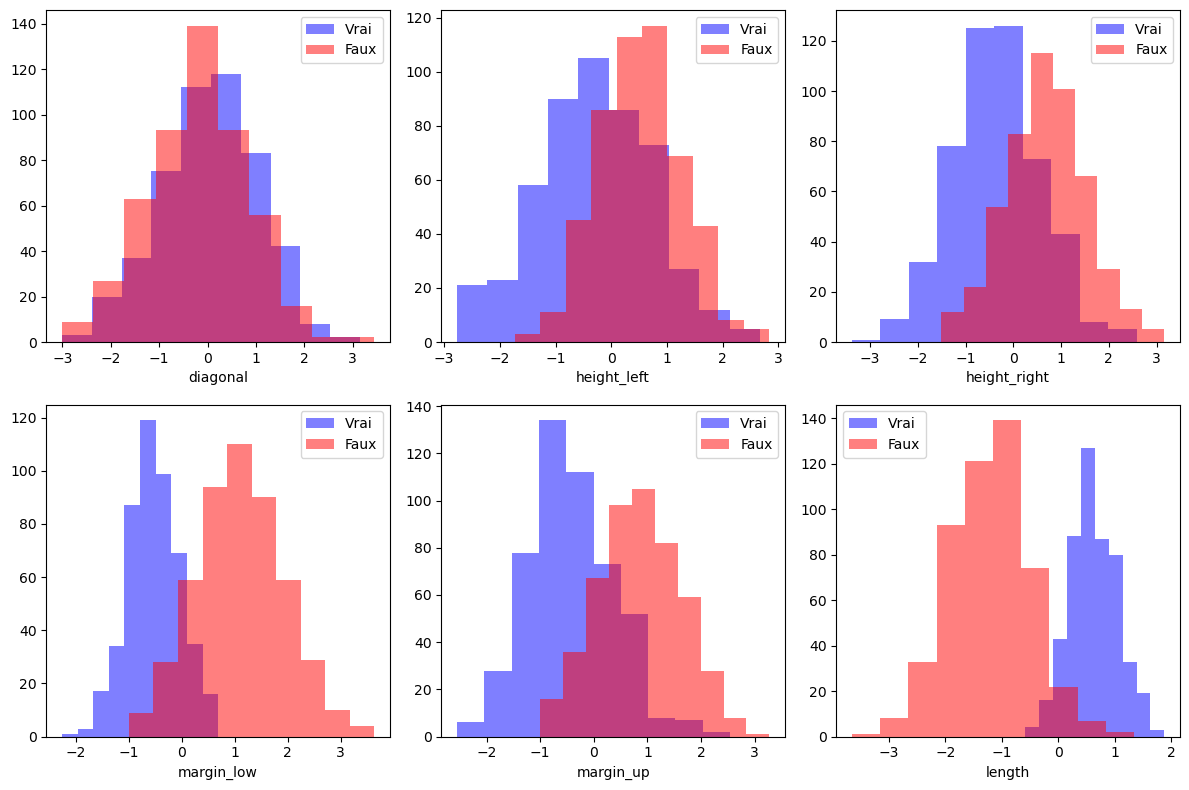

In [1055]:
# Sélectionner les colonnes de dimensions
dimensions = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
dimensions_data = data[dimensions]

# Créer un subplot de 2x3 pour les histogrammes des dimensions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Parcourir les dimensions et créer les histogrammes correspondants
for i, dim in enumerate(dimensions):
    ax = axes[i // 3, i % 3]

    # Séparer les données en fonction de la valeur de la colonne "is_genuine"
    genuine_data = dimensions_data[data['is_genuine']]
    genuine_data = genuine_data.sample(n=500, random_state=42, replace=True)
    fake_data = dimensions_data[~data['is_genuine']]

    # Tracer les histogrammes pour les vrais billets en bleu et les faux billets en rouge
    ax.hist(genuine_data[dim], bins=10, color='blue', alpha=0.5, label='Vrai')
    ax.hist(fake_data[dim], bins=10, color='red', alpha=0.5, label='Faux')

    ax.set_xlabel(dim)
    ax.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

On remarque une différence de répartition entre les vrais et faux flagrantes sur la colonne "length" et "margin_low"

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
c:\Users\antoi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


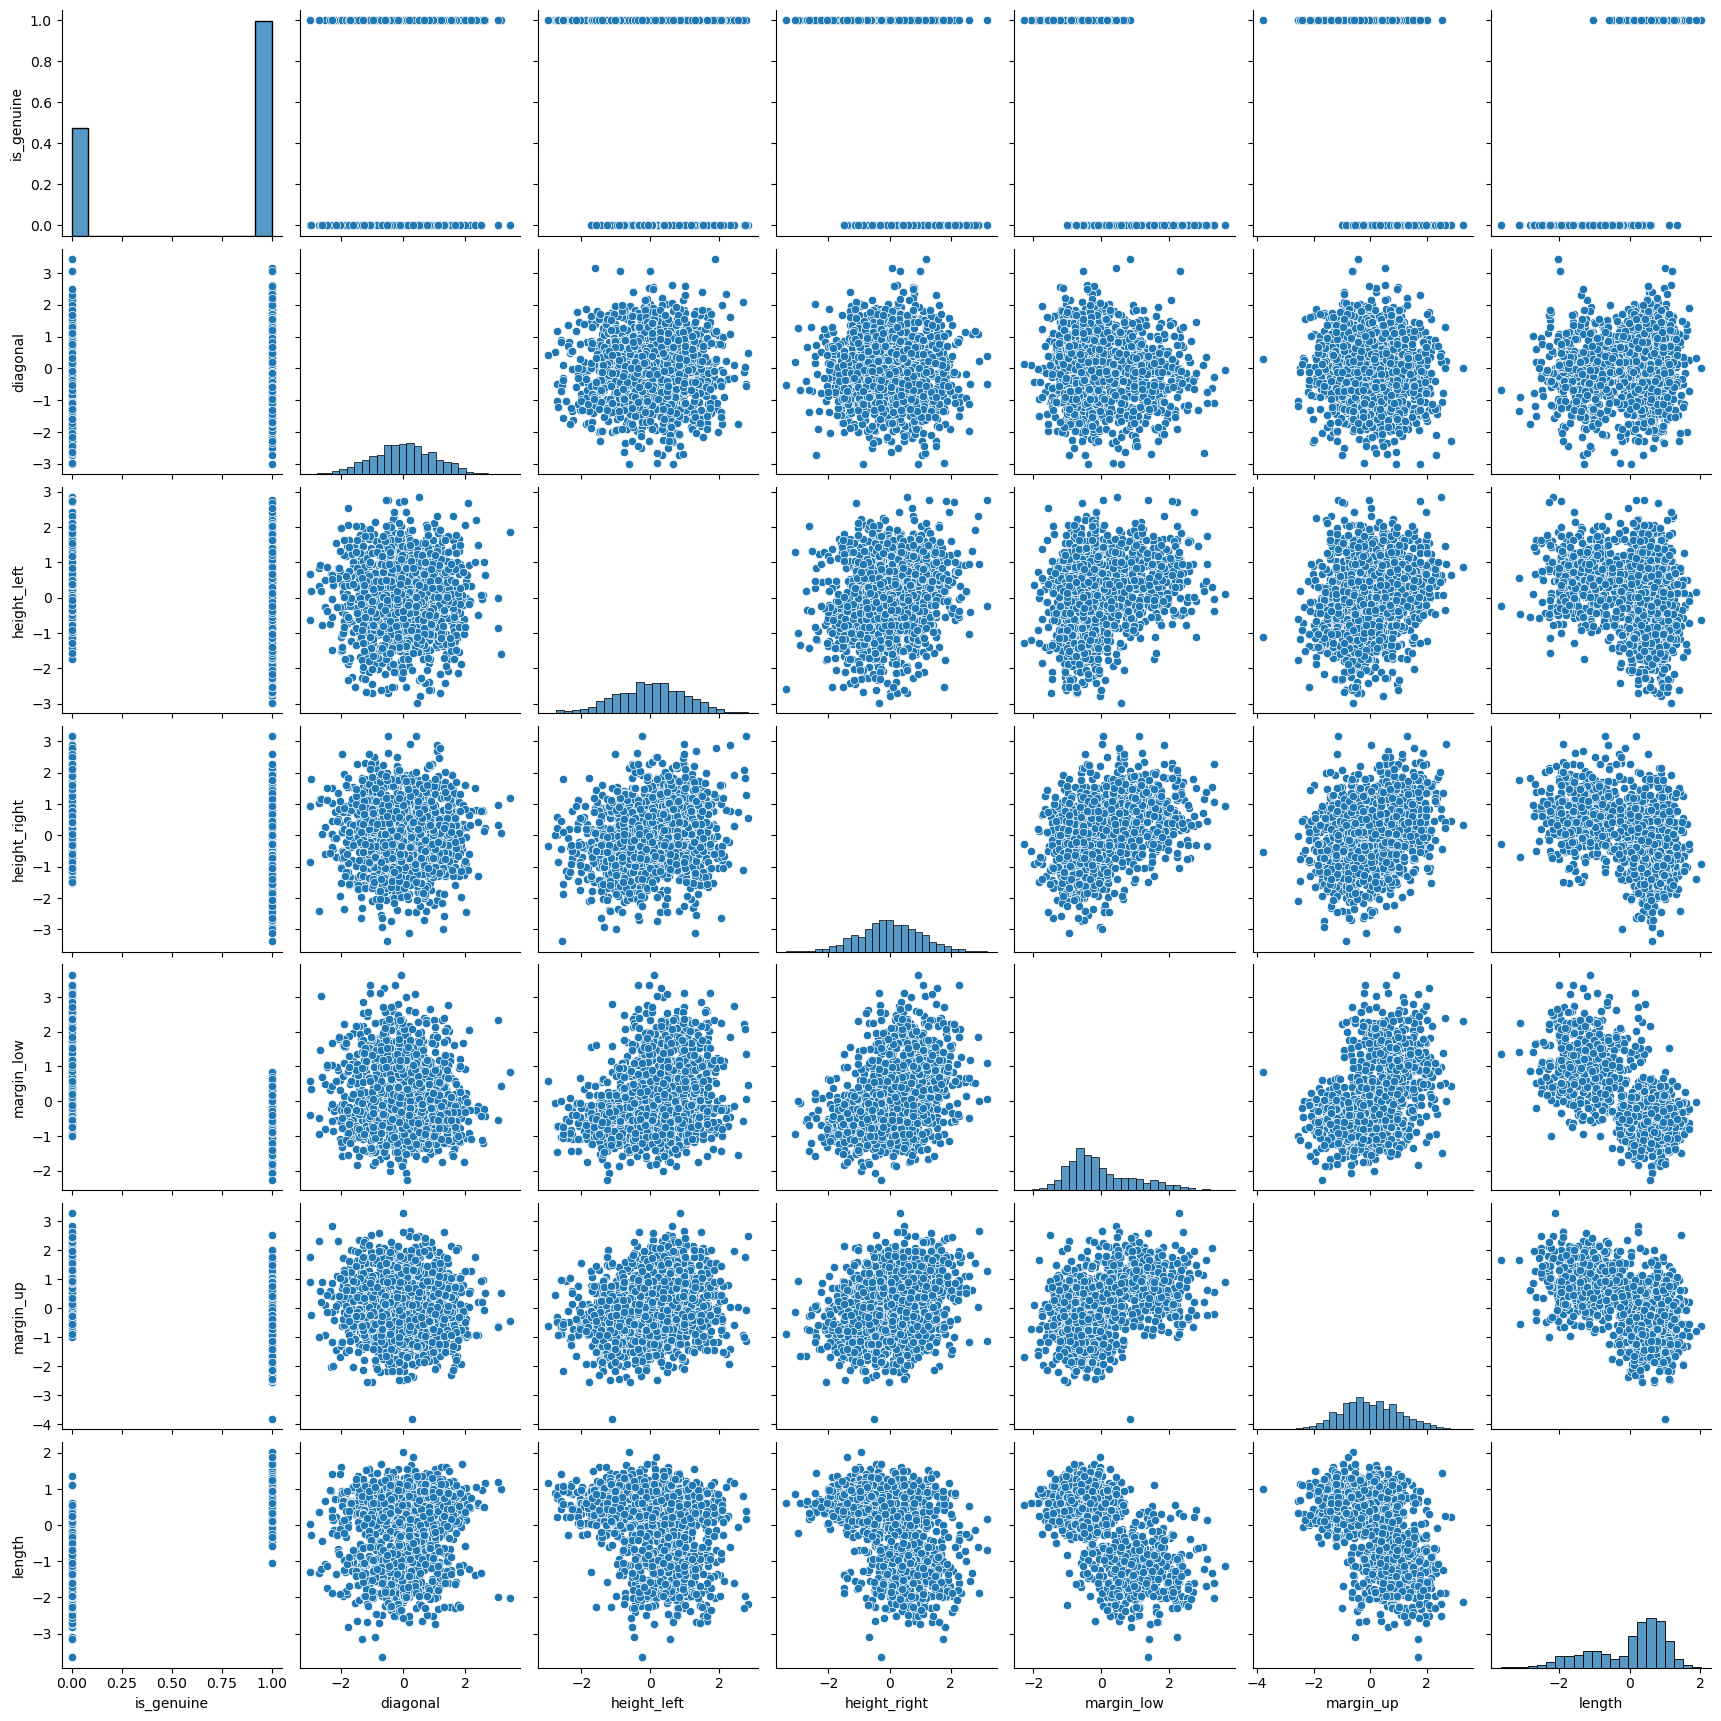

In [1056]:
sns.pairplot(data)

## Corrélation

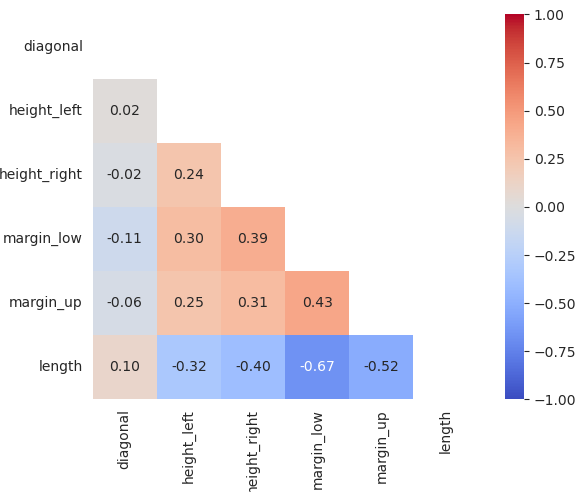

In [1057]:
# Création matrice de corrélation
corr = data_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, fmt=".2f", cmap="coolwarm", square=True)

## Etude outliers

### Utilsation du Z-score

In [1058]:
fc.etude_outliers(data, seuil=2.0)

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'diagonal' est 3.73%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_left' est 4.6%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_right' est 4.27%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_low' est 4.93%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_up' est 4.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'length' est 3.93%


## Exploration de méthode pour traiter les outliers

Dans cette étape, nous allons explorer différentes méthodes pour traiter les outliers présents dans notre jeu de données. Nous allons comparer trois approches différentes. 

La première approche consiste à ne rien faire et à utiliser les outliers dans notre ensemble d'entraînement tel quels. Cela peut être utile dans certains cas où les outliers sont réellement représentatifs de la population ou lorsque leur suppression pourrait entraîner une perte d'informations importante.

La deuxième approche que nous allons explorer est la méthode log. Nous allons appliquer cette transformation à notre jeu de données afin de réduire l'impact des outliers. Cette méthode peut être efficace pour atténuer l'effet des valeurs extrêmes et rendre les données plus conformes à une distribution normale.

Enfin, la troisième approche que nous allons tester consiste à remplacer les outliers par la médiane. Cette méthode permet de remplacer les valeurs aberrantes par une valeur centrale qui est moins sensible aux valeurs extrêmes. Cela peut être utile lorsque les outliers sont considérés comme des erreurs de mesure ou des valeurs aberrantes.

Nous allons ensuite évaluer les performances de nos modèles de prédiction en utilisant chacune de ces méthodes. L'objectif est de déterminer quelle approche donne les meilleurs résultats de prédiction pour notre problème spécifique.

### Utilisation de log(x)

In [1059]:
# # transformation des données avec ln(x) pour réduire l'effet des outliers
# for col in column_names:
#     data[col] = np.log(data[col])

### Remplacement des outliers par la médianne

In [1060]:
# # Identifie les outliers
# for col in column_names:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
#     print(f"Nombre d'outliers pour {col} : {len(outliers)}")


# # Traite les outliers
# for col in column_names:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     data[col] = data[col].where((data[col] >= Q1 - 1.5*IQR) & (data[col] <= Q3 + 1.5*IQR), data[col].median())

### Utilisation du Z-score

In [1061]:
fc.etude_outliers(data, seuil=2.0)

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'diagonal' est 3.73%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_left' est 4.6%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_right' est 4.27%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_low' est 4.93%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_up' est 4.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'length' est 3.93%


## Regression linéaire pour les valeurs manquantes

Nous allons utiliser une régression linéaire afin de remplacer nos valeurs manquantes dans notre Df.

In [1062]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Séléection de la colonne lenght car il y aune forte correlation entre les deux.

### Creation du modèle

In [1063]:
# Séparer les données en deux ensembles
train_data = data.dropna()  # données sans valeurs manquantes
predict_data = data[data['margin_low'].isna()]  # données avec valeurs manquantes dans 'margin_low'

#Selection de length car la correlation est la plus forte
# Préparer les données pour l'entraînement
X_train = train_data[['length']]
y_train = train_data['margin_low']

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs manquantes
X_predict = predict_data[['length']]
predicted_values = model.predict(X_predict)

### Evaluation du modèle

In [1064]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Évaluer le modèle sur l'ensemble d'entraînement
train_predictions = model.predict(X_train)
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Erreur absolue moyenne (MAE) : {mae}")

Erreur quadratique moyenne (MSE) : 0.5554407291706509
Erreur absolue moyenne (MAE) : 0.5775092230385076


L'erreur est très faible, on a donc de bonne performance sur le modèle. On peut donc continuer notre étude avec notre jeu de données complet

### Remplacement des données dans le df

In [1065]:
# Remplacer les valeurs manquantes dans le DataFrame original
data.loc[data['margin_low'].isna(), 'margin_low'] = predicted_values

In [1066]:
# Remplacer les valeurs manquantes dans le DataFrame original
data_num.loc[data_num['margin_low'].isna(), 'margin_low'] = predicted_values

In [1067]:
data.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### Etude graphique de la répartition

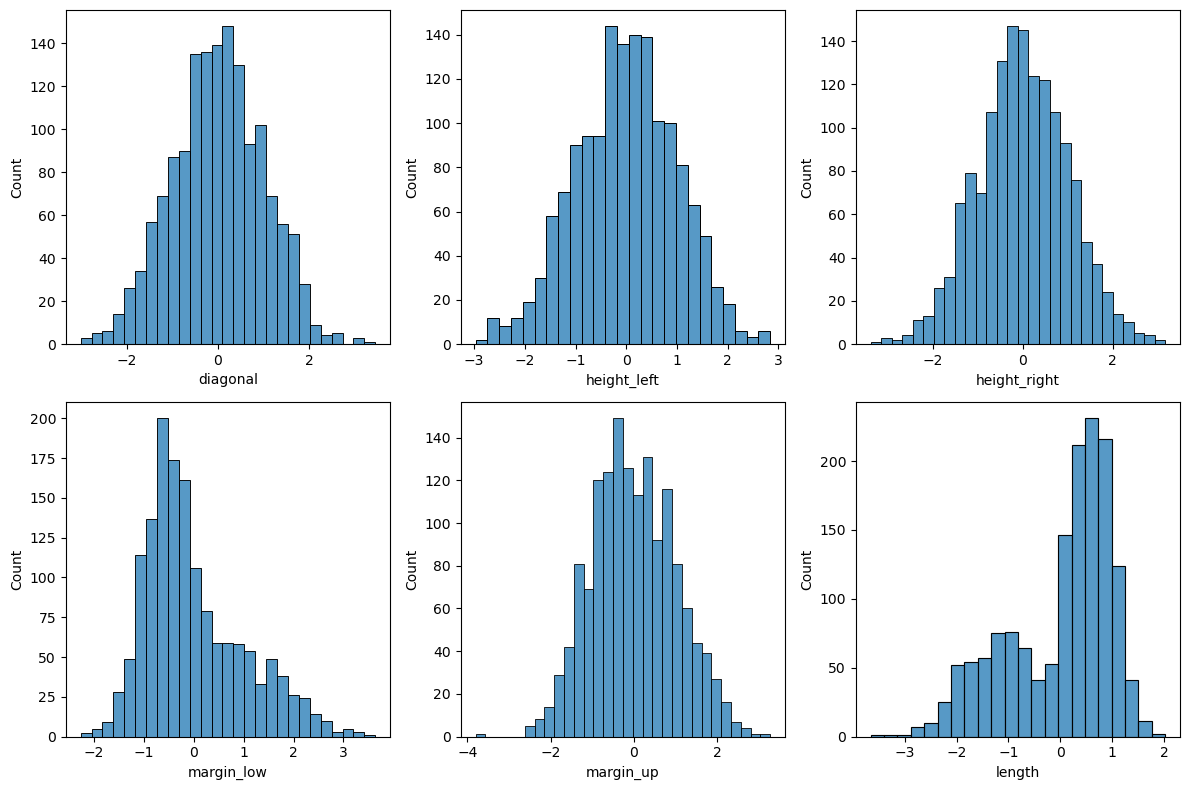

In [1068]:
# tracer les distributions des dimensions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.histplot(data.diagonal, ax=axes[0, 0])
sns.histplot(data.height_left, ax=axes[0, 1])
sns.histplot(data.height_right, ax=axes[0, 2])
sns.histplot(data.margin_low, ax=axes[1, 0])
sns.histplot(data.margin_up, ax=axes[1, 1])
sns.histplot(data.length, ax=axes[1, 2])

plt.tight_layout()
plt.show()

On remarque que margin_low et length ne sont pas centré et ne suivent pas une distribution normale.

# **III.Modèle de régression Logistique**

La régression logistique est un modèle statistique utilisé pour prédire la probabilité d'un résultat binaire en fonction d'une ou plusieurs variables prédictives. Elle est couramment utilisée pour les tâches de classification où la variable dépendante est catégorielle.

## Création du modèle

In [1069]:
# Séparer le jeu de données en variables explicatives (X) et variable cible (y)
X = data.drop('is_genuine', axis=1)
y = data['is_genuine']

# Séparer le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression logistique
lr = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
lr.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_lr = lr.predict(X_test)

## Evaluation du modèle

In [1070]:
# Évaluer les performances
eval_lr = classification_report(y_test, y_pred_lr)
print(eval_lr)

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



## Matrice de confusion

### Jeu de test

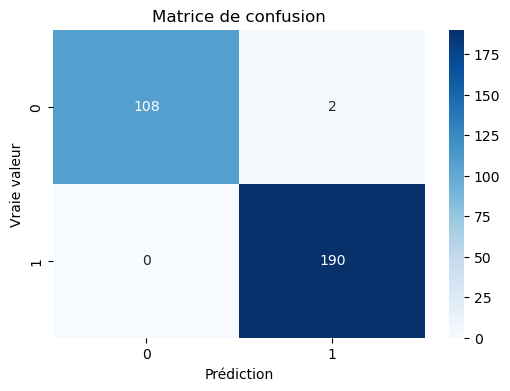

In [1071]:
from sklearn.metrics import confusion_matrix

# Créer la matrice de confusion
confusion_lr_test = confusion_matrix(y_test, y_pred_lr)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_lr_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

### Jeu d'entrainement

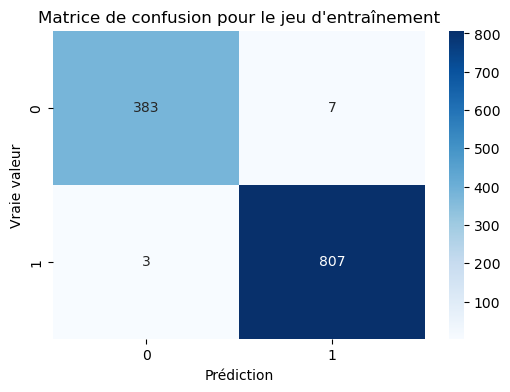

In [1072]:
# Utilisez votre modèle pour faire des prédictions sur le jeu d'entraînement
y_train_pred_lr = lr.predict(X_train)

# Créez la matrice de confusion
confusion_lr_train = confusion_matrix(y_train, y_train_pred_lr)

# Créez un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_lr_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour le jeu d\'entraînement')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

# **IV.Modèle SVC**

## Création du modèle

Le Support Vector Machine (SVM) est un algorithme d'apprentissage automatique utilisé pour résoudre à la fois des problèmes de classification et de régression. Il est particulièrement puissant pour la classification de données dans des espaces multidimensionnels. 

Voici quelques concepts clés associés aux SVM :

Séparation des données par un hyperplan : L'objectif principal d'un SVM est de trouver un hyperplan qui maximise la marge entre deux classes de données. L'hyperplan est choisi de manière à maximiser la distance entre les échantillons les plus proches de chaque classe, appelés "vecteurs de support". Cette marge est appelée "marge maximale".

Kernel Trick : Les SVM sont efficaces pour gérer des données qui ne sont pas linéairement séparables. Pour cela, ils utilisent une technique appelée "Kernel Trick". Cela consiste à projeter les données dans un espace de dimension supérieure où elles deviennent linéairement séparables. Les noyaux couramment utilisés incluent le noyau linéaire, le noyau polynomial et le noyau gaussien (RBF).

En résumé, les SVM sont une méthode d'apprentissage automatique puissante et polyvalente qui trouve de nombreuses applications dans la classification et la régression, en particulier lorsque la séparation des données est complexe ou que les données sont de haute dimension. 

In [1073]:
from sklearn.svm import SVC

# Create an instance of the Support Vector Classifier
svc = SVC()

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc.predict(X_test)

## Evaluation

In [1074]:
# Évaluer les performances
eval_svc = classification_report(y_test, y_pred_svc)    
print(eval_svc)

              precision    recall  f1-score   support

       False       1.00      0.99      1.00       110
        True       0.99      1.00      1.00       190

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



## Matrice de confusions

### Jeu de test

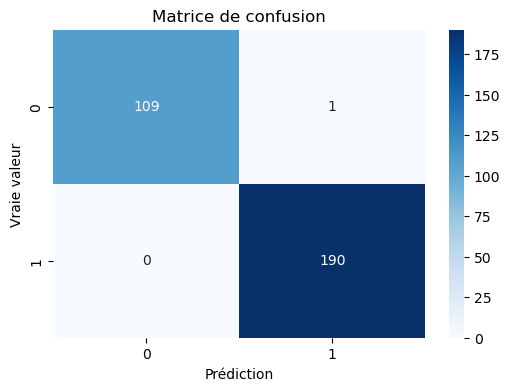

In [1075]:
# Créer la matrice de confusion pour le modèle SVM
confusion_svc_test = confusion_matrix(y_test, y_pred_svc)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_svc_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

### jeu d'entrainement

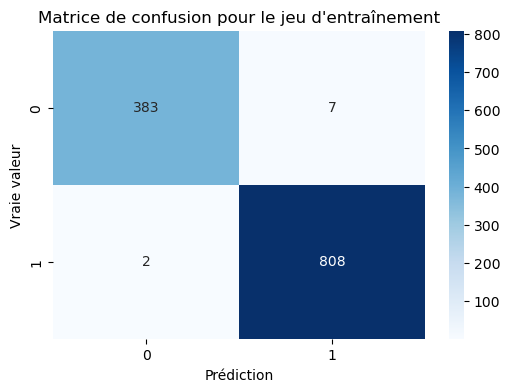

In [1076]:
# Utilisez votre modèle pour faire des prédictions sur le jeu d'entraînement
y_train_pred_svc = svc.predict(X_train)

# Créez la matrice de confusion
confusion_svc_train = confusion_matrix(y_train, y_train_pred_svc)

# Créez un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_svc_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour le jeu d\'entraînement')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

# **V.KNN**

Le modèle KNN (K-Nearest Neighbors) est un algorithme d'apprentissage automatique utilisé pour la classification. Il est basé sur le principe que des points similaires sont proches les uns des autres dans l'espace des caractéristiques. 

## Création du modèle

In [1077]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

## Evaluation

In [1078]:
# Évaluer les performances
eval_knn = classification_report(y_test, y_pred_knn)
print(eval_knn)

              precision    recall  f1-score   support

       False       1.00      0.95      0.98       110
        True       0.97      1.00      0.99       190

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



## Matrice de confusions

### Jeu de test

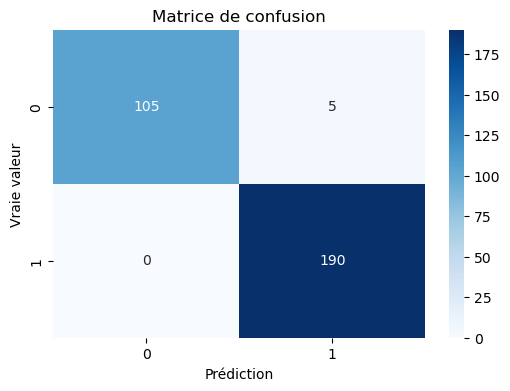

In [1079]:
# Créer la matrice de confusion pour le modèle KNN
confusion_knn_test = confusion_matrix(y_test, y_pred_knn)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_knn_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

### Jeu d'entrainement

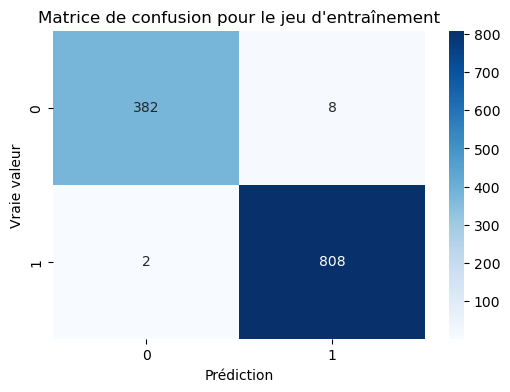

In [1080]:
# Utilisez votre modèle pour faire des prédictions sur le jeu d'entraînement
y_train_pred_knn = knn.predict(X_train)

# Créez la matrice de confusion
confusion_knn_train = confusion_matrix(y_train, y_train_pred_knn)

# Créez un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_knn_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour le jeu d\'entraînement')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

# **VI.Decision tree**

Le modèle de l'arbre de décision (Decision Tree) est un algorithme d'apprentissage supervisé utilisé pour résoudre des problèmes de classification. L'arbre de décision commence par un nœud racine qui représente l'ensemble des données d'entrée. À chaque nœud, une caractéristique est sélectionnée pour diviser les données en sous-ensembles plus petits.

In [1081]:
from sklearn.tree import DecisionTreeClassifier

# Créer un objet modèle
tree = DecisionTreeClassifier(max_depth=5)

# Entraîner le modèle
tree.fit(X_train, y_train)

# Faire des prédictions
y_pred_tree = tree.predict(X_test)

In [1082]:
# Évaluer les performances
eval_tree = classification_report(y_test, y_pred_tree)
print(eval_tree)

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       110
        True       0.98      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



## Matrice de confusions

### Jeu de test

Matrice de confusion pour KNN :


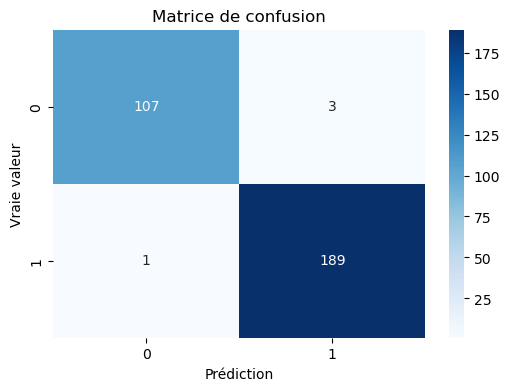

In [1083]:
# Créer la matrice de confusion pour le modèle KNN
confusion_tree_test = confusion_matrix(y_test, y_pred_tree)
print("Matrice de confusion pour KNN :")

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_tree_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

### Jeu d'entrainement

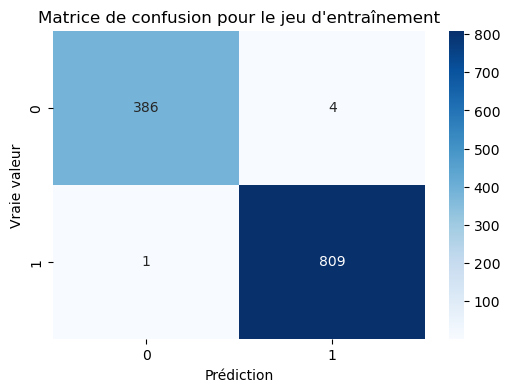

In [1084]:
# Utilisez votre modèle pour faire des prédictions sur le jeu d'entraînement
y_train_pred_tree = tree.predict(X_train)

# Créez la matrice de confusion
confusion_tree_train = confusion_matrix(y_train, y_train_pred_tree)

# Créez un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_tree_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour le jeu d\'entraînement')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

# **VII.Random Forest**

Le modèle Random Forest est un algorithme d'apprentissage supervisé utilisé pour la classification. Il est basé sur l'idée d'agréger les prédictions de plusieurs arbres de décision pour obtenir une prédiction plus précise et robuste.

Dans un Random Forest, chaque arbre est construit à partir d'un échantillon bootstrap des données d'entraînement, ce qui signifie que chaque arbre est formé sur un sous-ensemble aléatoire des données. Cela permet de créer une diversité parmi les arbres et de réduire la corrélation entre eux.

Une fois que tous les arbres ont été construits, les prédictions de tous les arbres sont agrégées pour faire une prédiction finale. Pour les tâches de classification, la classe majoritaire parmi les prédictions des arbres est choisie.

In [1085]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

In [1086]:
# Évaluer les performances
eval_rf = classification_report(y_test, y_pred_rf)
print(eval_rf)

              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



## Matrice de confusion

### Jeu de test

Matrice de confusion pour KNN :


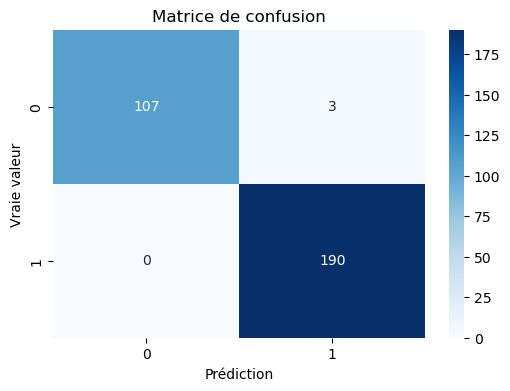

In [1087]:
# Créer la matrice de confusion pour le modèle KNN
confusion_rf_test = confusion_matrix(y_test, y_pred_rf)
print("Matrice de confusion pour KNN :")

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_rf_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

### Jeu d'entrainement

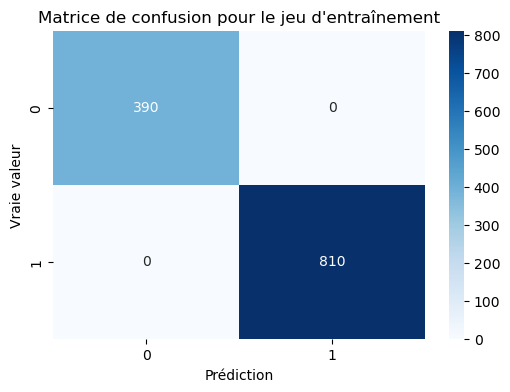

In [1088]:
# Utilisez votre modèle pour faire des prédictions sur le jeu d'entraînement
y_train_pred_rf = rf.predict(X_train)

# Créez la matrice de confusion
confusion_rf_train = confusion_matrix(y_train, y_train_pred_rf)

# Créez un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_rf_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion pour le jeu d\'entraînement')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

# **Kmeans**

L'algorithme K-means est une méthode non supervisée de clustering largement utilisée. Elle vise à diviser un ensemble de données en un nombre prédéfini (K) de clusters distincts. Chaque donnée est attribuée au cluster dont le centre (ou centroïde) est le plus proche.

Voici comment fonctionne l'algorithme K-means :

1. Il commence par sélectionner aléatoirement K points de données comme centroïdes initiaux.
2. Ensuite, chaque point de données est attribué au centroïde le plus proche, formant ainsi K clusters.
3. Les centroïdes de chaque cluster sont ensuite recalculés en prenant la moyenne de tous les points de données du cluster.
4. Les étapes 2 et 3 sont répétées jusqu'à ce que les centroïdes ne changent plus significativement ou qu'un nombre maximum d'itérations soit atteint.

Nous allons utiliser le Kmeans afin créer des clusters qui nous permetrront de prédire si un billet est faux ou non. Nosu allons donc avoir besoin de deux cluster, un pour chaque cas (Vrai et Faux).

In [1089]:
# Importer la classe KMeans du module sklearn.cluster
from sklearn.cluster import KMeans

# Créer une instance de la classe KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2)

# Entraîner le modèle KMeans sur les données numériques
kmeans.fit(data_num)

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=2)

In [1090]:
# Obtenir les labels attribués par KMeans à chaque échantillon
labels = kmeans.labels_

# Ajouter la colonne 'cluster' au dataframe 'data' avec les labels attribués par KMeans
data['cluster'] = kmeans.labels_

# Afficher un échantillon aléatoire de 10 lignes du dataframe 'data' avec la colonne 'cluster'
data.sample(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
233,True,0.988419,0.435816,-2.212798,0.096495,0.856694,0.632136,0
892,True,2.201162,0.335603,0.767063,-1.078937,1.288220,0.758219,0
782,True,0.955642,-0.031846,0.736343,-0.928241,0.036795,1.251091,0
262,True,-0.158771,-0.198867,-0.338864,-0.792614,-0.524189,-0.044129,0
1159,False,-1.600953,1.003691,0.336980,1.151370,-0.610494,-1.144493,1
728,True,-0.060441,0.268794,0.736343,-0.611778,0.856694,-1.052796,1
141,True,-1.437068,0.268794,0.951385,0.367749,-0.308426,0.746757,0
1182,False,0.300105,0.402412,1.965152,1.302067,1.762898,-1.694675,1
755,True,-1.109300,0.302198,-0.338864,-0.159689,-0.092663,-0.044129,0
1032,False,0.398435,0.636242,1.504349,0.036217,0.640931,-1.465432,1


## Matrice de confusion

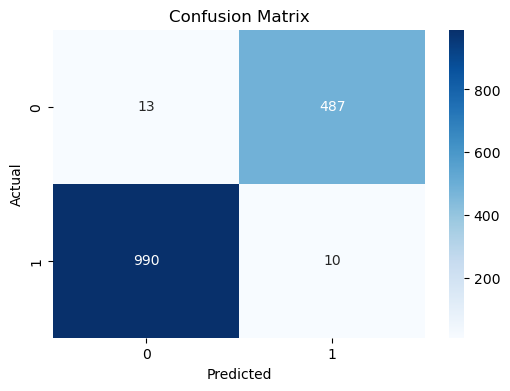

In [1091]:
# Creationmatrice de  confusion 
confusion_matrix = confusion_matrix(data['is_genuine'], data['cluster'])

# Creation de la heatmap de la matrice de confusion 
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1092]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supposons que y_test sont vos vraies valeurs et y_pred_tree sont vos valeurs prédites
precision_kmeans = precision_score(y_test, y_pred_tree, average='weighted')
recall_kmeans = recall_score(y_test, y_pred_tree, average='weighted')
f1_kmeans = f1_score(y_test, y_pred_tree, average='weighted')

print("Precision: ", precision_kmeans)
print("Recall: ", recall_kmeans)
print("F1 Score: ", f1_kmeans)

Precision:  0.9867091049382716
Recall:  0.9866666666666667
F1 Score:  0.9866404086011176


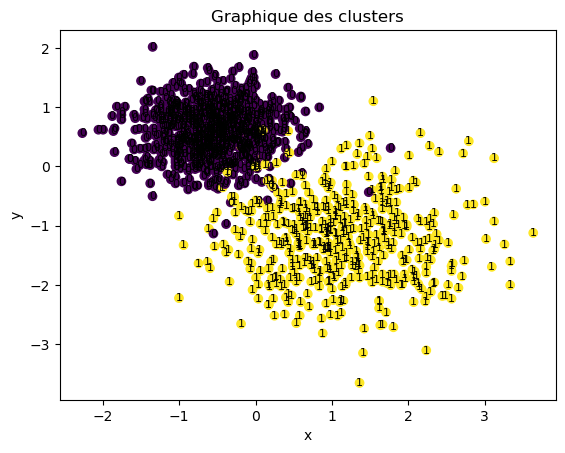

In [1093]:
# Créer un graphique de dispersion avec le numéro du cluster
plt.scatter(data['margin_low'], data['length'], c=data['cluster'])

# Ajouter des étiquettes et un titre
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique des clusters')

# Ajouter le numéro du cluster à chaque point
for i, label in enumerate(data['cluster']):
    plt.text(data['margin_low'][i], data['length'][i], label, fontsize=8, ha='center', va='center')

# Afficher le graphique
plt.show()

In [1094]:
data_num.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750


In [1095]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.09600039, -0.28194592, -0.35241933, -0.55057945, -0.42692359,
         0.59324013],
       [-0.19432338,  0.57071311,  0.71336493,  1.10583412,  0.86417597,
        -1.20083284]])

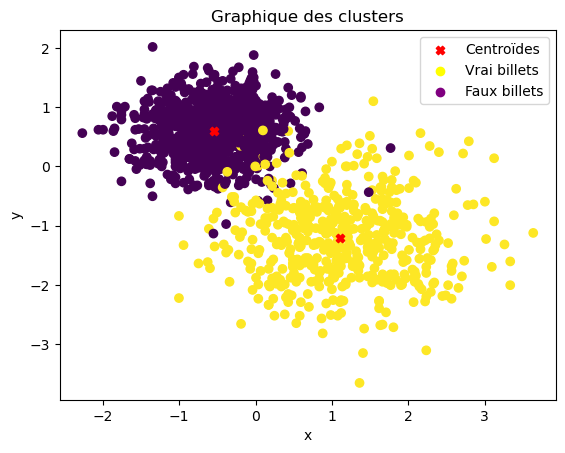

In [1096]:
# Créer un graphique de dispersion
plt.scatter(data['margin_low'], data['length'], c=data['cluster'])

# Ajouter des étiquettes et un titre
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique des clusters')

# Ajouter les centroïdes au graphique
plt.scatter(centroids[:, 3], centroids[:, 5], marker='X', color='red', label='Centroïdes')

# Ajouter les légendes pour les couleurs jaunes et violettes
plt.scatter([], [], color='yellow', label='Vrai billets')
plt.scatter([], [], color='purple', label='Faux billets')

# Afficher le graphique
plt.legend()
plt.show()

# **VIII. Comparaison des modèles**

In [1097]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculer la précision, le rappel et le score F1 pour chaque modèle
precision = [precision_score(y_test, y_pred_svc), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_tree), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_lr)]
recall = [recall_score(y_test, y_pred_svc), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_tree), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_lr)]
f1 = [f1_score(y_test, y_pred_svc), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_tree), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_lr)]

# Créer un dataframe pour stocker les métriques
metrics_df = pd.DataFrame({'Modèle': ['SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Régression logistique'],
                           'Précision': precision,
                           'Rappel': recall,
                           'Score F1': f1})

# Concatenate the metrics_df DataFrame with a new DataFrame containing the KMeans metrics
kmeans_metrics_df = pd.DataFrame({'Modèle': ['KMeans'],
                                  'Précision': [precision_kmeans],
                                  'Rappel': [recall_kmeans],
                                  'Score F1': [f1_kmeans]})
metrics_df = pd.concat([metrics_df, kmeans_metrics_df], ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)


                  Modèle  Précision    Rappel  Score F1
0                    SVC   0.994764  1.000000  0.997375
1                    KNN   0.974359  1.000000  0.987013
2          Decision Tree   0.984375  0.994737  0.989529
3          Random Forest   0.984456  1.000000  0.992167
4  Régression logistique   0.989583  1.000000  0.994764
5                 KMeans   0.986709  0.986667  0.986640


Jeu de données avec Outliers

|      Modèle             | Précision | Rappel   | Score F1 |
|-------------------------|-----------|----------|----------|
| SVC                     | 0.994764  | 1.000000 | 0.997375 |
| KNN                     | 0.974359  | 1.000000 | 0.987013 |
| Decision Tree           | 0.984375  | 0.994737 | 0.989529 |
| Random Forest           | 0.989583  | 1.000000 | 0.994764 |
| Régression logistique   | 0.979381  | 1.000000 | 0.989583 |
| Kmeans                  | 0.986709  | 0.986667 | 0.986640 |

Jeu de données avce remplacement par la médiane

|      Modèle             | Précision | Rappel   | Score F1 |
|-------------------------|-----------|----------|----------|
| SVM                     | 0.979275  | 0.994737 | 0.986945 |
| KNN                     | 0.969388  | 1.000000 | 0.984456 |
| Decision Tree           | 0.979275  | 0.994737 | 0.986945 |
| Random Forest           | 0.974359  | 1.000000 | 0.987013 |
| Régression logistique   | 0.974359  | 1.000000 | 0.987013 |
| Kmeans                  | 0.986709  | 0.986667 | 0.986640 |

Jeu de données avce l'application de la fonction logarithme

|      Modèle             | Précision | Rappel   | Score F1 |
|-------------------------|-----------|----------|----------|
| SVM                     | 0.979275  | 0.994737 | 0.986945 |
| KNN                     | 0.969388  | 1.000000 | 0.984456 |
| Decision Tree           | 0.979275  | 0.994737 | 0.986945 |
| Random Forest           | 0.974359  | 1.000000 | 0.987013 |
| Régression logistique   | 0.974359  | 1.000000 | 0.987013 |
| Kmeans                  | 0.986709  | 0.986667 | 0.986640 |

SVM est meilleure de peu

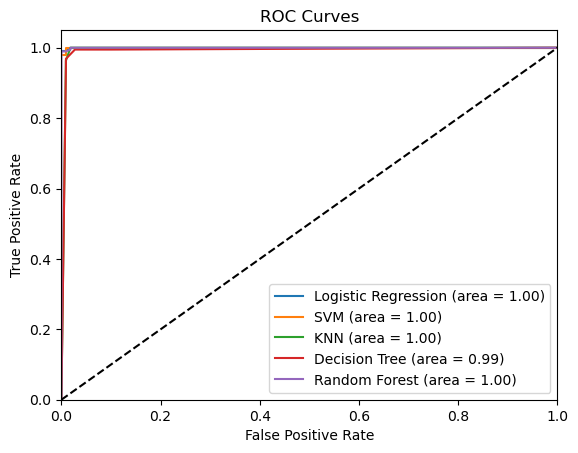

In [1098]:
from sklearn.metrics import roc_curve, auc

# Calculate the decision scores
y_score_logreg = lr.decision_function(X_test)
y_score_svm = svc.decision_function(X_test)
y_score_knn = knn.predict_proba(X_test)[:, 1]
y_score_tree = tree.predict_proba(X_test)[:, 1]
y_score_rf = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)

# Plot the ROC curves
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (area = %0.2f)' % auc(fpr_logreg, tpr_logreg))
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % auc(fpr_svm, tpr_svm))
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % auc(fpr_knn, tpr_knn))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (area = %0.2f)' % auc(fpr_tree, tpr_tree))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % auc(fpr_rf, tpr_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

# **IX. Test avec l'autre fichier**

## Test

In [1099]:
# Charger les données de test
file_path='C:\\Users\\antoi\\OneDrive\\Bureau\\OC drive\\OC\\P10\\DATA\\fichiertype.csv'
test_data = pd.read_csv(file_path)
test_data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [1100]:
# from sklearn.preprocessing import MinMaxScaler

# # Créer l'objet MinMaxScaler
# scaler = MinMaxScaler()

# # Sélectionner les colonnes numériques
# column_names = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# # Appliquer le MinMaxScaler sur les colonnes numériques
# test_data[column_names] = scaler.fit_transform(test_data[column_names])
# test_data.head()

In [1101]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Select the columns you want to scale
column_names = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Apply the StandardScaler to the selected columns
test_data[column_names] = scaler.fit_transform(test_data[column_names])
test_data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,-0.664228,-0.502224,-1.228900,0.438224,0.485681,-1.124014,A_1
1,-0.287604,-0.050787,0.449459,1.493702,0.564017,-0.289103,A_2
2,0.157497,1.106022,0.904607,0.144293,1.190702,-0.937094,A_3
3,1.835186,1.021377,1.046841,-0.590533,-1.629382,1.094107,A_4
4,-1.040852,-1.574388,-1.172007,-1.485686,-0.611018,1.256104,A_5


In [1102]:
# Supprimer la colonne 'id' car elle n'est pas nécessaire pour la prédiction
test_data_num = test_data.drop('id', axis=1)

# Utiliser le modèle pour faire des prédictions
y_pred = svc.predict(test_data_num)
print(y_pred)

[False False False  True  True]


In [1103]:
# utiliser la méthode `predict` du modèle pour prédire le cluster de chaque point dans `test_data`
cluster_labels = kmeans.predict(test_data_num)
cluster_labels
# `cluster_labels` est maintenant un tableau contenant l'indice du cluster pour chaque point dans `new_data`
# Cluster 1 est le cluster des vrais billets et cluster 0 est le cluster des faux billets

array([1, 1, 1, 0, 0])

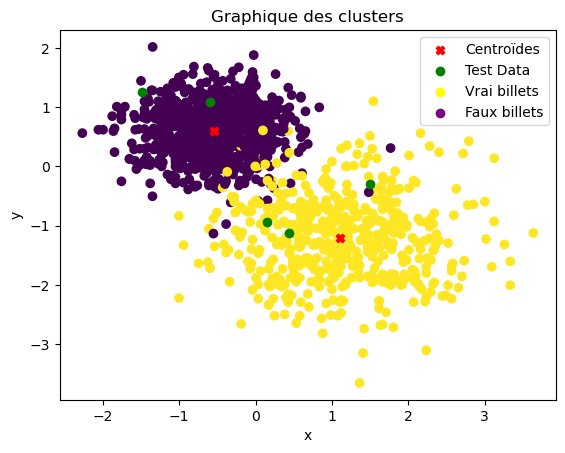

In [1104]:
# Créer un graphique de dispersion
plt.scatter(data['margin_low'], data['length'], c=data['cluster'])

# Ajouter des étiquettes et un titre
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique des clusters')

# Ajouter les centroïdes au graphique
plt.scatter(centroids[:, 3], centroids[:, 5], marker='X', color='red', label='Centroïdes')

# Ajouter les points de test_data au graphique
plt.scatter(test_data_num['margin_low'], test_data_num['length'], color='green', label='Test Data')

# Ajouter les légendes pour les couleurs jaunes et violettes
plt.scatter([], [], color='yellow', label='Vrai billets')
plt.scatter([], [], color='purple', label='Faux billets')

# Afficher le graphique
plt.legend()
plt.show()

On obtient le même résultats avec les deux modèles, 3 faux billets et 2 vrais billets.

In [1105]:
test_data['Type']= y_pred
test_data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Type
0,-0.664228,-0.502224,-1.228900,0.438224,0.485681,-1.124014,A_1,False
1,-0.287604,-0.050787,0.449459,1.493702,0.564017,-0.289103,A_2,False
2,0.157497,1.106022,0.904607,0.144293,1.190702,-0.937094,A_3,False
3,1.835186,1.021377,1.046841,-0.590533,-1.629382,1.094107,A_4,True
4,-1.040852,-1.574388,-1.172007,-1.485686,-0.611018,1.256104,A_5,True
